# Lotka-Volterra with Delay a Multiprocessing Solution in Python
----

Declaração das librarias a serem emrpegadas:

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

"""Lotka-Volterra.py: Algoritmo para solucionar as equações de Lotka-Volterra
com delays."""
__author__      = "Ivar Vargas Belizario"
__copyright__   = "Copyright 2020"


"""Librerías para multiprocessamento"""
import multiprocessing as mp
from multiprocessing import Pool

"""Librerías para o tempo"""
import timeit

"""Librerías para importartar a função linspace e o mõdulo array"""
from pylab import linspace, array

"""Librería para solucionar equações differencias"""
from ddeint import ddeint

"""Librerías para gerar visualizações"""
import matplotlib.pyplot as plt

"""Librerías para manipulação de matrices"""
import numpy as np

Definição dos métodos para solucionar as equações e para a paralelização:

In [2]:
def model(Y,t,delay,a,b,c,d):
    """A função modelo é definida para solucionar as equações Lotka-Volterra com delays"""
    x,y = Y(t)
    xd,yd = Y(t-delay)
    dx =  x*(a-(b*yd))
    dy = -y*(c-(d*xd))
    return array([dx, dy])

def algoritmo1(delay):
    """Algoritmo para solucionar as equações Lotka-Volterra empregando
    a libreria ddeint"""
    tt = linspace(0,30,20000)
    a = 0.5
    b = 0.5
    c = 0.5
    d = 0.5
    x0 = 1
    y0 = 2    
    f = lambda t : array([x0, y0])
    return ddeint(model, f, tt, fargs=(delay,a,b,c,d))

Método de inicio:

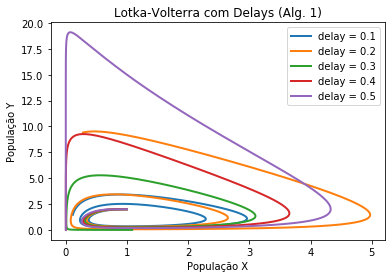

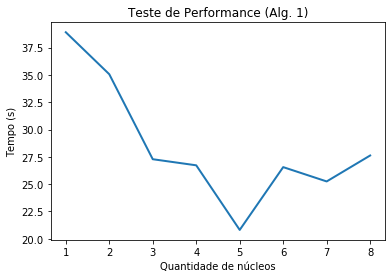

In [3]:
def main():
    """Método inicial"""

    #1) Equações de Lotka-Volterra com atraso de tempo
    delays = [0.1, 0.2, 0.3, 0.4, 0.5]
    
    fig, ax = plt.subplots(1, figsize=(6, 4))
    ax.set_title('Lotka-Volterra com Delays (Alg. 1)')
    ax.set_xlabel('População X')
    ax.set_ylabel('População Y')
    for i in range(len(delays)):
        results = algoritmo1(delays[i])
        ax.plot(results[:,0], results[:,1], lw=2, label='delay = %.01f'%delays[i])
    ax.legend()
    ax.figure.savefig("results1.png")
    
    """A solução apresentada no método algoritmo1(delay) utiliza a libraria ddeint,
    que tem como finalidade solucionar equações diferenciais de forma simples
    mas com um alto custo computacional. Desta forma este algoritmo nos resultados
    apresenta um alto custo computacional pela necessidade do cálculo das equações
    diferenciais com a libraria ddeint.
    """

    #2) Teste de performance
    nc = mp.cpu_count()
    
    Y_time = []
    X_cpus = []
    for i in range(nc):
        start = timeit.default_timer()
        pool = Pool(processes=i+1)
        results = pool.map(algoritmo1, delays)
        pool.close()
        stop = timeit.default_timer()
        timev = stop - start
        Y_time.append(timev)
        X_cpus.append(i+1)
        
    fig, ax = plt.subplots(1, figsize=(6, 4))
    ax.set_title('Teste de Performance (Alg. 1)')
    ax.set_xlabel('Quantidade de núcleos')
    ax.set_ylabel('Tempo (s)')
    ax.plot(X_cpus, Y_time, lw=2)
    ax.figure.savefig("results2.png")

if __name__ == "__main__":
    main()